The data available includes the following fields for 571 managers:

    employee_id for each manager
    performance_group of each manager: Bottom performer, Middle performer, Top performer
    yrs_employed: Total length of time employed in years
    manager_hire: whether or not the individual was hired directly to be a manager (Y) or promoted to manager (N)
    test_score: score on a test given to all managers
    group_size: the number of employees in the group they are responsible for
    concern_flag: whether or not the individual has been the subject of a complaint by a member of their group
    mobile_flag: whether or not the individual works mobile (Y) or in the office (N)
    customers: the number of customer accounts the manager is responsible for
    high_hours_flag: whether or not the manager has entered unusually high hours into their timesheet in the past year
    transfers: the number of transfer requests coming from the manager's group while they have been a manager
    reduced_schedule: whether the manager works part time (Y) or full time (N)
    city: the current office of the manager.


Using whatever method you deem appropriate, try to determine:

    Which variables have an effect on manager performance?
    For those variables which have an effect, how 'strong' is the effect?
    What might be an explanation for such effects?
    What are the limitations of your analysis?

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib
matplotlib.style.use('ggplot')

In [15]:
#Import the data 

In [16]:
df = pd.read_csv("data.csv")
df.head()

,employee_id,performance_group,yrs_employed,manager_hire,test_score,group_size,concern_flag,mobile_flag,customers,high_hours_flag,transfers,reduced_schedule,city
0,c4578853,Bottom,4.6,N,205,10,N,N,12,N,0,Y,San Francisco
1,a7d7afd6,Middle,5.3,N,227,14,N,Y,18,N,0,N,New York
2,272b93f1,Bottom,5.2,N,227,10,N,N,12,N,0,Y,Chicago
3,be8b6baa,Middle,4.9,N,273,19,N,N,26,Y,0,N,New York
4,a18ecc4e,Bottom,4.9,N,227,17,Y,N,26,Y,5,Y,Orlando


In [17]:
# Cheaking Null 

df.isnull().any()


employee_id          False
performance_group    False
yrs_employed         False
manager_hire         False
test_score           False
group_size           False
concern_flag         False
mobile_flag          False
customers            False
high_hours_flag      False
transfers            False
reduced_schedule     False
city                 False
dtype: bool

In [18]:
# Conversion 
df.replace(['Y','N'],[1,0],inplace = True)
df.replace(['Top','Middle','Bottom'],[3,2,1],inplace = True)
df.replace(['Toronto','Chicago','New York','Houston','San Francisco','Orlando'],[6,5,4,3,2,1],inplace = True)

In [19]:
#####  Statistic overview 

df.shape

(571, 13)

In [20]:
#type 
df.dtypes

employee_id           object
performance_group      int64
yrs_employed         float64
manager_hire           int64
test_score             int64
group_size             int64
concern_flag           int64
mobile_flag            int64
customers              int64
high_hours_flag        int64
transfers              int64
reduced_schedule       int64
city                   int64
dtype: object

In [21]:
## Full stat 
df.describe()

,performance_group,yrs_employed,manager_hire,test_score,group_size,concern_flag,mobile_flag,customers,high_hours_flag,transfers,reduced_schedule,city
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,1.889667,4.595622,0.050788,240.171629,11.823117,0.099825,0.241681,21.061296,0.395797,0.796848,0.250438,4.507881
std,0.574378,0.536197,0.219757,80.042326,2.947831,0.300029,0.428477,4.876160,0.489450,1.113265,0.433645,1.455006
min,1.000000,2.000000,0.000000,0.000000,5.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,4.300000,0.000000,182.000000,10.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,4.000000
50%,2.000000,4.600000,0.000000,235.000000,11.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,4.000000
75%,2.000000,5.000000,0.000000,295.000000,13.000000,0.000000,0.000000,24.000000,1.000000,2.000000,0.500000,6.000000
max,3.000000,6.000000,1.000000,500.000000,25.000000,1.000000,1.000000,40.000000,1.000000,5.000000,1.000000,6.000000


,performance_group,yrs_employed,manager_hire,test_score,group_size,concern_flag,mobile_flag,customers,high_hours_flag,transfers,reduced_schedule,city
performance_group,1.000000,-0.203225,-0.011124,0.184687,0.115900,-0.078501,-0.083932,0.034365,0.149367,-0.095475,-0.093133,0.052474
yrs_employed,-0.203225,1.000000,-0.447749,-0.014294,0.168109,0.256815,0.128319,0.058950,0.010626,0.028191,0.004724,-0.027053
manager_hire,-0.011124,-0.447749,1.000000,-0.032911,-0.018606,0.029404,-0.093322,0.067490,0.024823,-0.043805,0.031983,-0.053378
test_score,0.184687,-0.014294,-0.032911,1.000000,0.203271,0.054076,-0.028835,0.035034,0.202197,0.010945,-0.127955,-0.002392
group_size,0.115900,0.168109,-0.018606,0.203271,1.000000,0.105295,-0.061935,0.332859,0.154395,0.171328,-0.186246,-0.051008
concern_flag,-0.078501,0.256815,0.029404,0.054076,0.105295,1.000000,0.003059,0.078554,-0.018642,0.071327,-0.017192,-0.076153
mobile_flag,-0.083932,0.128319,-0.093322,-0.028835,-0.061935,0.003059,1.000000,-0.017179,-0.005186,0.088398,0.240200,-0.155019
customers,0.034365,0.058950,0.067490,0.035034,0.332859,0.078554,-0.017179,1.000000,0.361771,0.196854,-0.018058,-0.068687
high_hours_flag,0.149367,0.010626,0.024823,0.202197,0.154395,-0.018642,-0.005186,0.361771,1.000000,0.070552,-0.054545,0.010393
transfers,-0.095475,0.028191,-0.043805,0.010945,0.171328,0.071327,0.088398,0.196854,0.070552,1.000000,0.087402,-0.085657


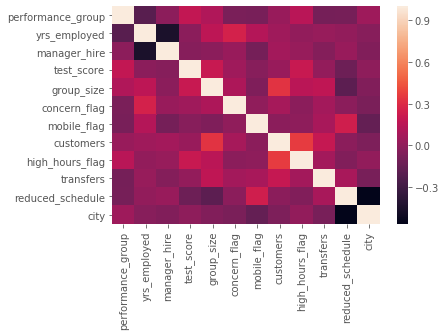

In [22]:
####Correlation Matrix & heatmap

corr= df.corr()

sns.heatmap(corr,xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)



corr

In [23]:
from sklearn.ensemble import ExtraTreesClassifier 
x = df.iloc[:,2:20]
y = df.iloc[:,1]

model = ExtraTreesClassifier()
model.fit(x,y)

model.feature_importances_


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.20804441, 0.01433436, 0.18666625, 0.16990663, 0.02039119,
       0.04082994, 0.1656638 , 0.02762767, 0.06018996, 0.02103544,
       0.08531035])

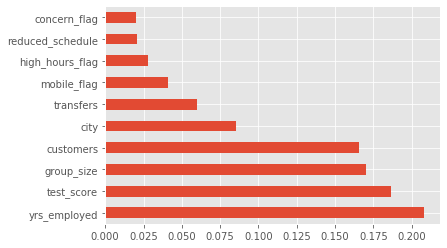

In [24]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)

feat_importances.nlargest(10).plot(kind='barh')
plt.show()

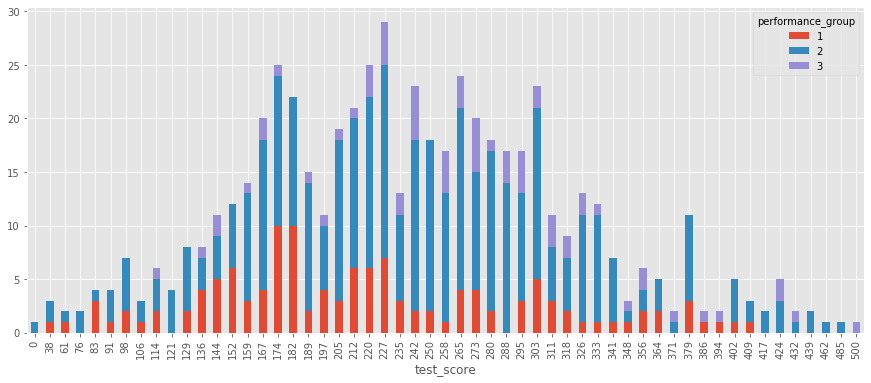

In [25]:
#  test_score vs performance_group 
     ## try kernel density estimate plot 
colour_table = pd.crosstab(index=df["test_score"], columns=df["performance_group"])
colour_table.plot(kind="bar",figsize=(15,6),stacked=True)

In [26]:
#  test_score vs group_size 
  ## too many size of group 

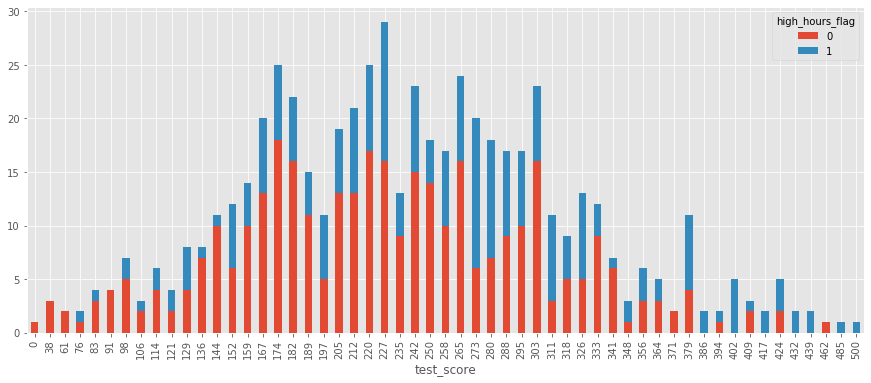

In [27]:
#  test_score vs high_hours_flag  
colour_table = pd.crosstab(index=df["test_score"], columns=df["high_hours_flag"])
colour_table.plot(kind="bar",figsize=(15,6),stacked=True)

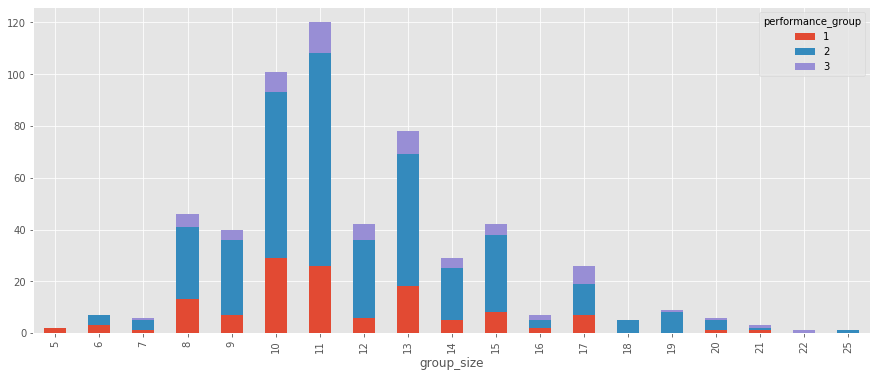

In [28]:
#  group_size vs performance_group
colour_table = pd.crosstab(index=df["group_size"], columns=df["performance_group"])
colour_table.plot(kind="bar",figsize=(15,6),stacked=True)

In [29]:
#  group_size vs customers (skip)
   ##  

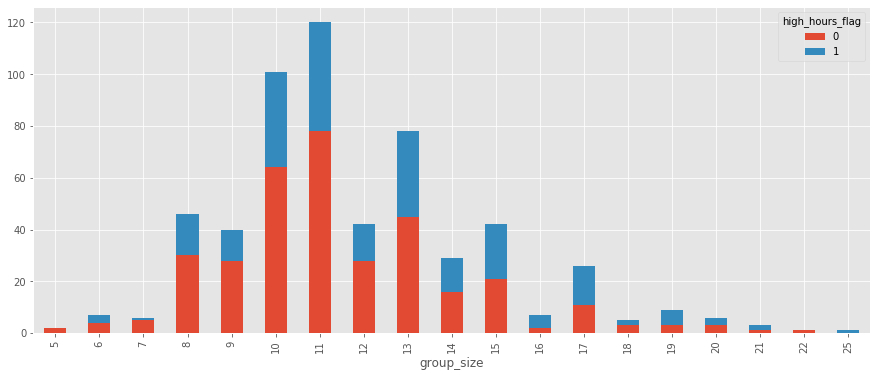

In [30]:
#  group_size vs high_hours_flag
colour_table = pd.crosstab(index=df["group_size"], columns=df["high_hours_flag"])
colour_table.plot(kind="bar",figsize=(15,6),stacked=True)

In [31]:
#  group_size vs test_score
####   too many values ( avoid )

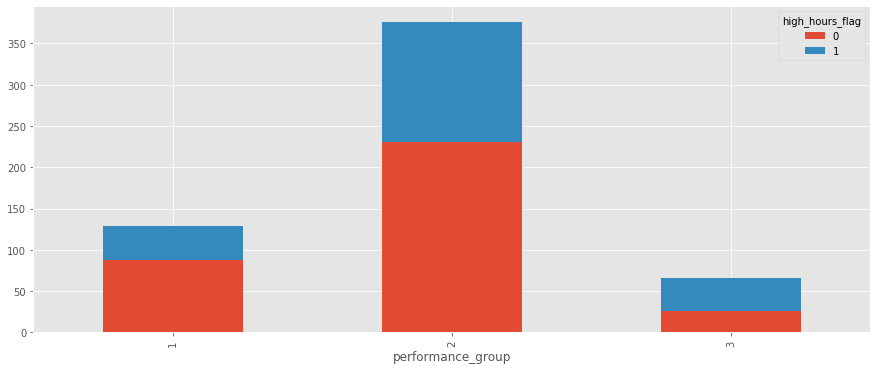

In [32]:
#  high_hours_flag vs performance_group  (not sure)
colour_table = pd.crosstab(index=df["performance_group"], columns=df["high_hours_flag"])
colour_table.plot(kind="bar",figsize=(15,6),stacked=True)

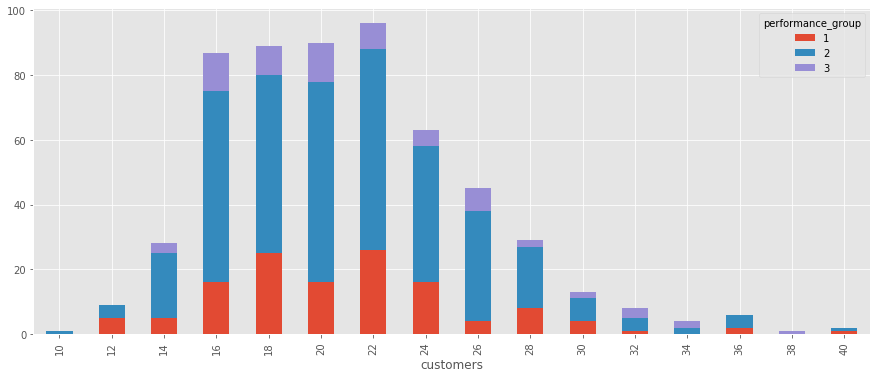

In [33]:
#  customers vs performance_group 
colour_table = pd.crosstab(index=df["customers"], columns=df["performance_group"])
colour_table.plot(kind="bar",figsize=(15,6),stacked=True) 

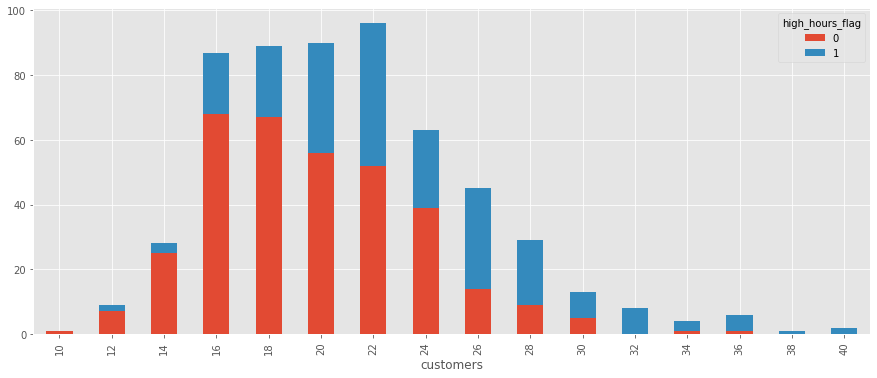

In [34]:
#  customers vs high_hours_flag 
colour_table = pd.crosstab(index=df["customers"], columns=df["high_hours_flag"])
colour_table.plot(kind="bar",figsize=(15,6),stacked=True) 

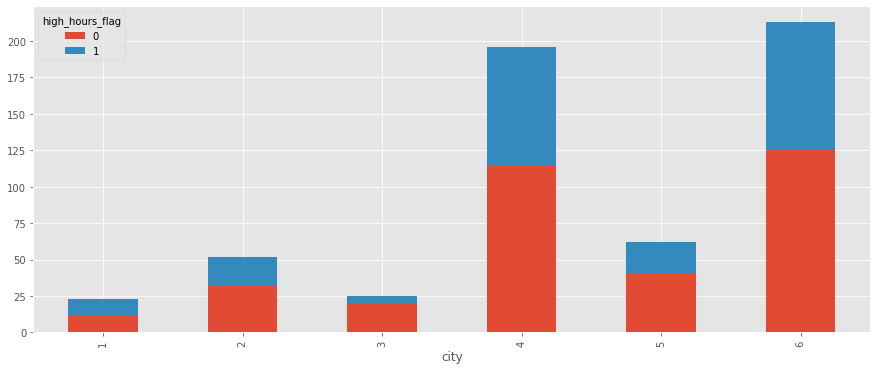

In [35]:
#city vs high_hours_flag

colour_table = pd.crosstab(index=df["city"], columns=df["high_hours_flag"])
colour_table.plot(kind="bar",figsize=(15,6),stacked=True) 

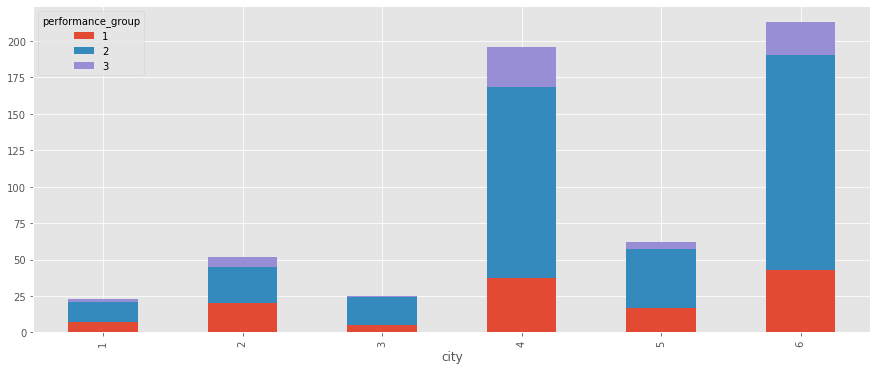

In [36]:
# performance_group vs city
colour_table = pd.crosstab(index=df["city"], columns=df["performance_group"])
colour_table.plot(kind="bar",figsize=(15,6),stacked=True) 

Text(0.5, 1.0, 'high hours flag')

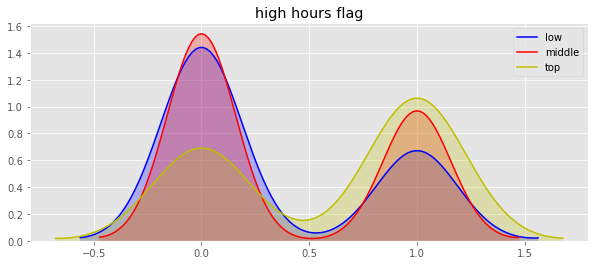

In [37]:
## finding biomodel distribution 
#only high_hours_flag to show biomodel distribution 
fig = plt.figure(figsize=(10,4))
ax=sns.kdeplot(df.loc[(df['performance_group']== 1),'high_hours_flag'],color='b',shade = True,label = 'low')
ax=sns.kdeplot(df.loc[(df['performance_group']== 2),'high_hours_flag'],color='r',shade = True,label = 'middle')
ax=sns.kdeplot(df.loc[(df['performance_group']== 3),'high_hours_flag'],color='y',shade = True,label = 'top')
plt.title('high hours flag')

Text(0.5, 1.0, 'group_size')

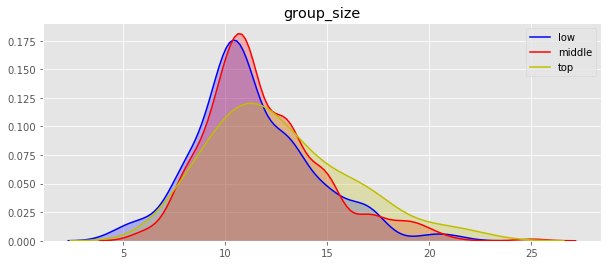

ERROR! Session/line number was not unique in database. History logging moved to new session 4


In [45]:
#group_size
fig = plt.figure(figsize=(10,4))
ax=sns.kdeplot(df.loc[(df['performance_group']== 1),'group_size'],color='b',shade = True,label = 'low')
ax=sns.kdeplot(df.loc[(df['performance_group']== 2),'group_size'],color='r',shade = True,label = 'middle')
ax=sns.kdeplot(df.loc[(df['performance_group']== 3),'group_size'],color='y',shade = True,label = 'top')
plt.title('group_size')

Text(0.5, 1.0, 'customers')

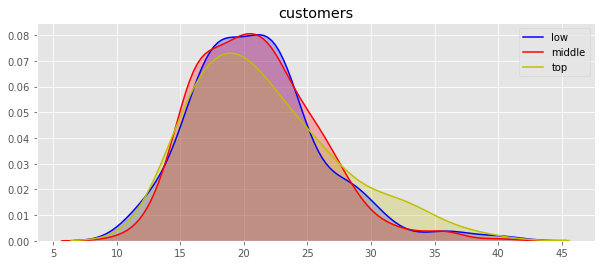

In [39]:
#customers
fig = plt.figure(figsize=(10,4))
ax=sns.kdeplot(df.loc[(df['performance_group']== 1),'customers'],color='b',shade = True,label = 'low')
ax=sns.kdeplot(df.loc[(df['performance_group']== 2),'customers'],color='r',shade = True,label = 'middle')
ax=sns.kdeplot(df.loc[(df['performance_group']== 3),'customers'],color='y',shade = True,label = 'top')
plt.title('customers')

Text(0.5, 1.0, 'test_score')

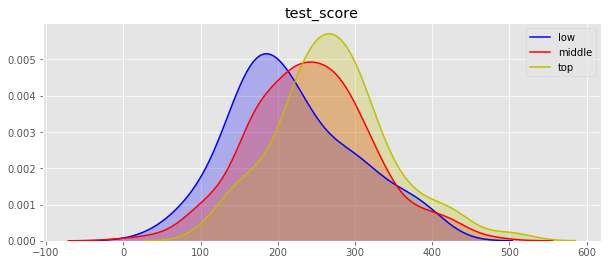

In [40]:
#test_score
fig = plt.figure(figsize=(10,4))
ax=sns.kdeplot(df.loc[(df['performance_group']== 1),'test_score'],color='b',shade = True,label = 'low')
ax=sns.kdeplot(df.loc[(df['performance_group']== 2),'test_score'],color='r',shade = True,label = 'middle')
ax=sns.kdeplot(df.loc[(df['performance_group']== 3),'test_score'],color='y',shade = True,label = 'top')
plt.title('test_score')

#box Plot 
1. group_size and customers
2. high_hours_flag and group_size
3 .group_size and performance_group
4 .group_size and customer  

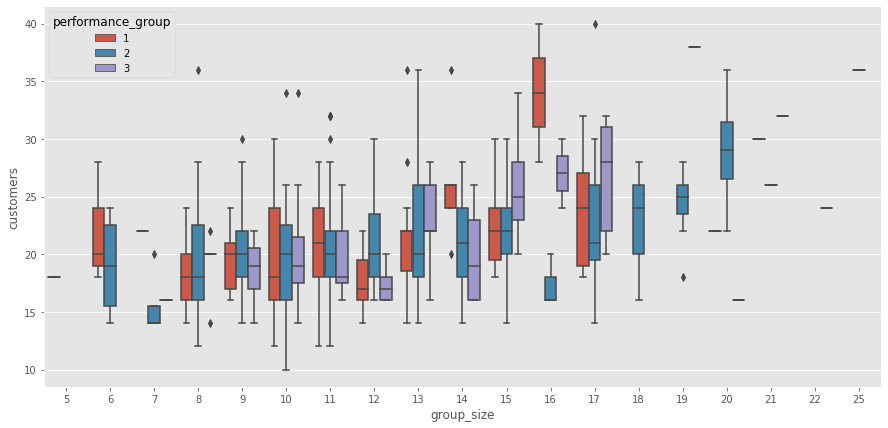

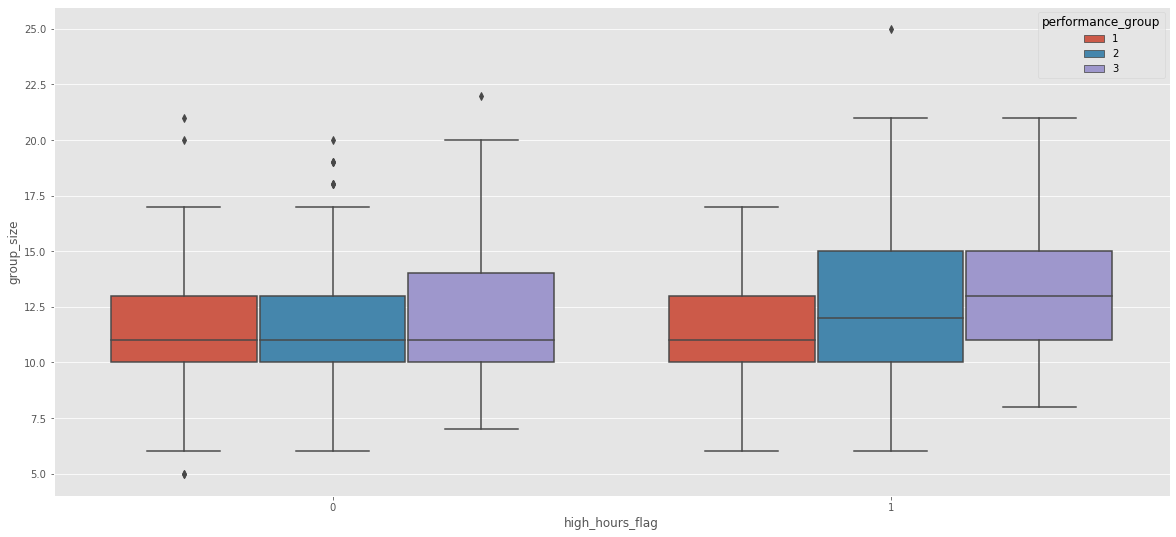

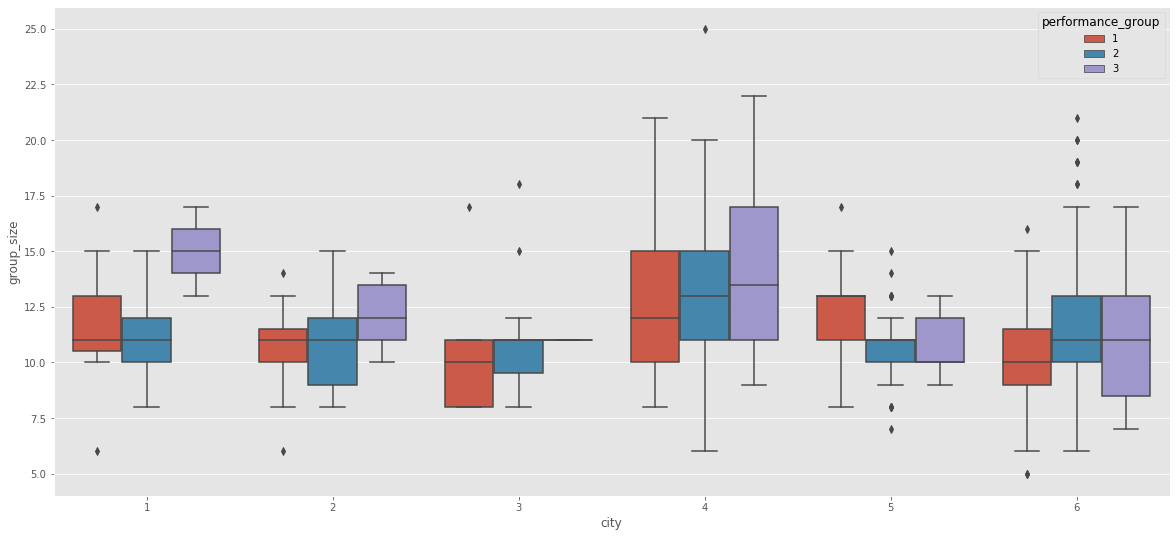

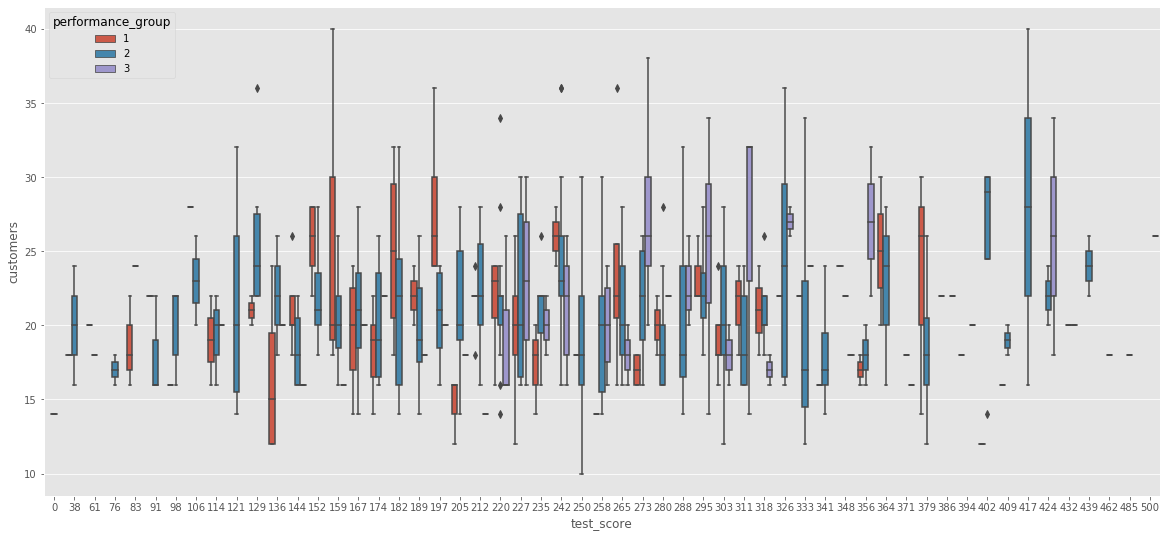

In [42]:
fig = plt.figure(figsize=(15,7))
sns.boxplot(x="group_size",y="customers",hue="performance_group",data=df)

fig = plt.figure(figsize=(20,9))
sns.boxplot(x="high_hours_flag",y="group_size",hue="performance_group",data=df)

fig = plt.figure(figsize=(20,9))
sns.boxplot(x="city",y="group_size",hue="performance_group",data=df)

fig = plt.figure(figsize=(20,9))
sns.boxplot(x="test_score",y="customers",hue="performance_group",data=df)

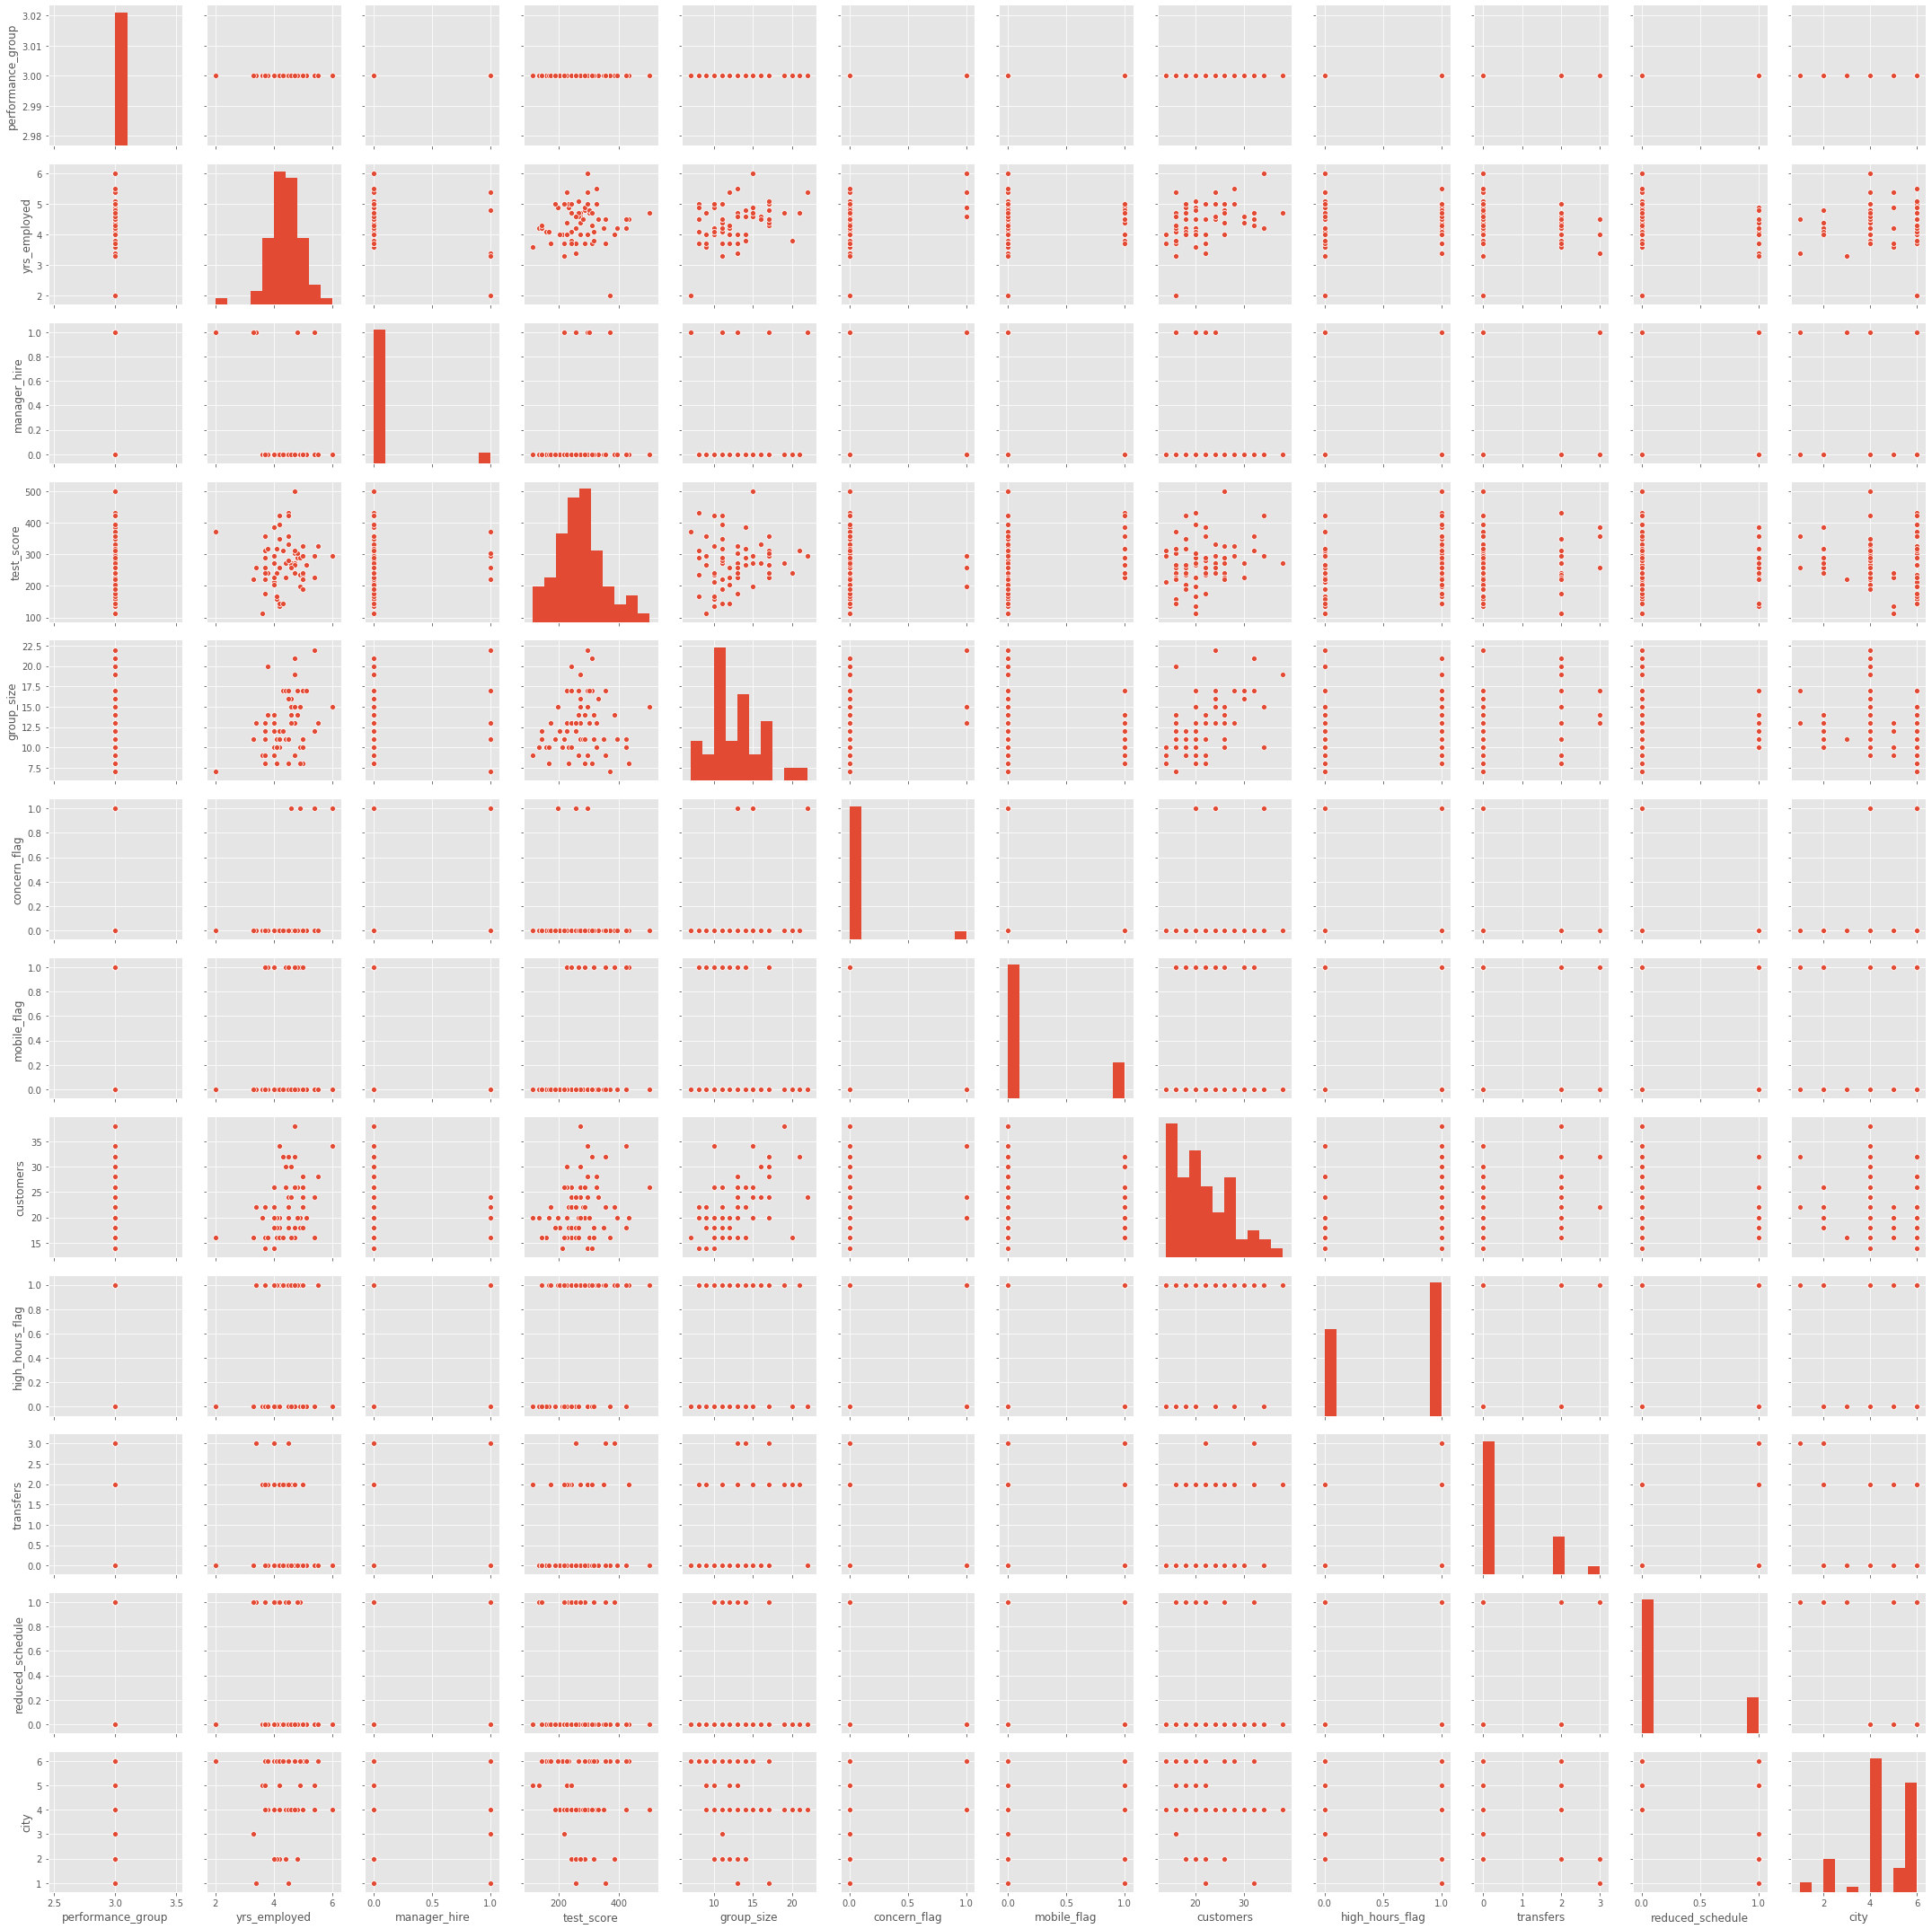

In [46]:
##########################################################################

performance=df[df['performance_group']==3]
sns.pairplot(performance)
plt.show()